In [1]:
include("src/Sim.jl")

Main.Sim

In [2]:
using DifferentialEquations
using Plots
using .Sim

In [23]:
@model MSD begin
    @parameter M D k g = 9.8
    @blk In = InBlock()
    @blk Out = OutBlock()
    @blk Constant = ConstantBlock(M*g)
    @blk Gain1 = GainBlock(D)
    @blk Gain2 = GainBlock(k)
    @blk Gain3 = GainBlock(1/M) outport:x_dd
    @blk Integrator = IntegratorBlock() outport:x_d
    @blk Integrator1 = IntegratorBlock(initialcondition = M*g/k) outport:x
    @connect In + Constant - Gain1 - Gain2 => Gain3
    @connect x_dd => Integrator
    @connect x_d => Integrator1
    @connect x_d => Gain1
    @connect x => Gain2
    @connect x => Out
end

MSD (generic function with 1 method)

In [20]:
systemequation(MSD())

quote
    #= /Users/nagatayuto/Desktop/JSSimJulia(Github)/src/SystemBlock.jl:115 =#
    modelinit = Any[0.0, :((convert(Float64, M) * 9.8) / convert(Float64, k))]
    #= /Users/nagatayuto/Desktop/JSSimJulia(Github)/src/SystemBlock.jl:116 =#
    function model!(var"d##445", var"##445", p, t)
        #= /Users/nagatayuto/Desktop/JSSimJulia(Github)/src/SystemBlock.jl:117 =#
        begin
            var"d##445"[1] = (1.0 / convert(Float64, M)) * (((terminator + convert(Float64, M) * 9.8) - convert(Float64, D) * var"##445"[1]) - convert(Float64, k) * var"##445"[2])
            var"d##445"[2] = var"##445"[1]
        end
    end
end

In [21]:
@model Test begin
    @parameter M D k f p_cycle p_width
    @blk msd = MSD(M=M, D=D, k=k) outport:x
    @blk pulse = PulseGeneratorBlock(amplitude=f, period=p_cycle, pulsewidth=p_width, phasedelay=10.0) outport:F
    @connect pulse => msd
end

Test (generic function with 1 method)

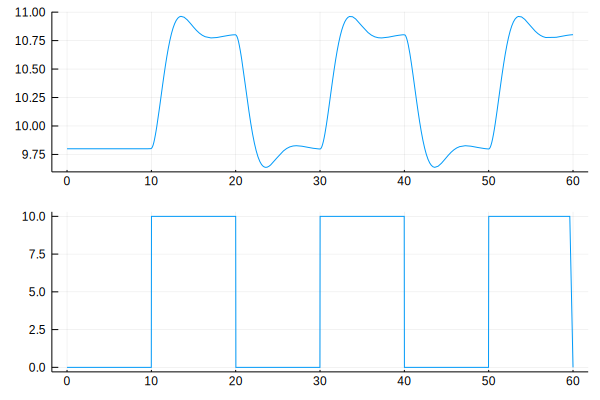

In [18]:
m = Test(M=10, D=10, k=10, f=10, p_cycle=20, p_width=50)
sol = @simulate(m, tspan = (0.0, 60.0), scope=[x, F])
sol.graph

|物理量　　　　　||単位|
|:-:||:-:|
|外力　　　　　　　　　|$f$($t$)|$N$|
|バネの自然長からの変位|$x$($t$)|$m$|

|システムパラメータ||単位|
|:-:||:-:|
|質量　　　　　　|$M$　|$kg$|
|バネ定数　　　　|$k$　|$N/m$|
|粘性減衰係数　　|$D$　|$N$/$(m/s)$|
|重力加速度　　　|$g$=$9.8$|$m/s^2$|